In [2]:
import pickle
# Load dictionary from the pickle file
with open('post_samples.pkl', 'rb') as f:
    loaded_samples = pickle.load(f)

In [87]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np

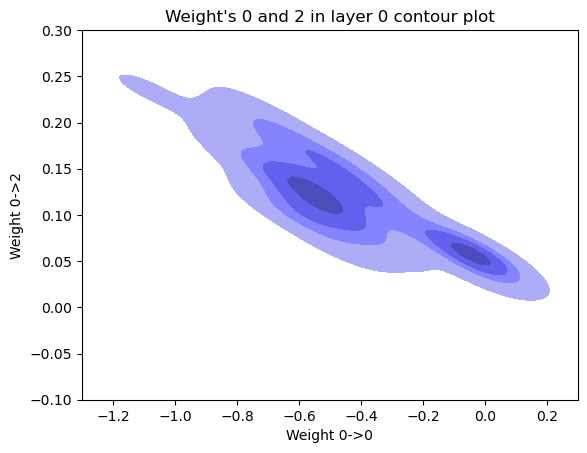

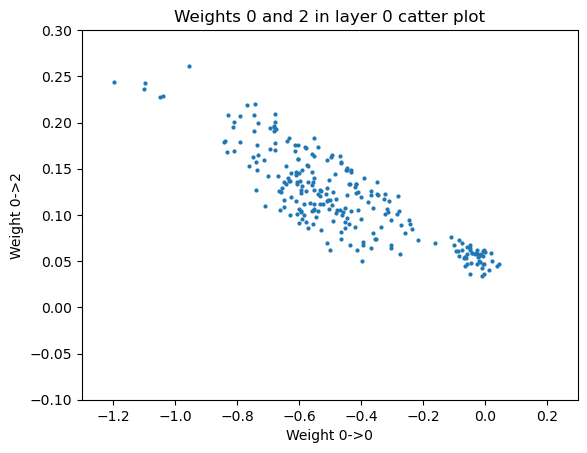

In [75]:
x=loaded_samples['layers.0.weight'][:,9,0]
y=loaded_samples['layers.0.weight'][:,9,2]
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x = x, y = y, fill = True, levels = [0.05, 0.3, 0.6, 0.9, 1], color = 'blue')
plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
plt.xlim([-1.3,0.3])
plt.ylim([-0.1,0.3])
plt.title("Weight's 0 and 2 in layer 0 contour plot")
plt.show()

plt.scatter(x = x, y = y, s = 4)
plt.xlim([-1.3,0.3])
plt.ylim([-0.1,0.3])
plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
plt.title("Weights 0 and 2 in layer 0 catter plot")
plt.show()

In [ ]:
import torch

def get_network_outputs(loaded_samples, input_data):
    """
    Computes the outputs of the neural network for each of the 250 sampled weights and biases.

    Parameters:
    - loaded_samples (dict): Dictionary with keys like 'layers.0.bias', 'layers.0.weight', etc.
    - input_data (torch.Tensor): Input data to feed into the network (shape [batch_size, input_dim]).

    Returns:
    - outputs (torch.Tensor): Network outputs for each sample (shape [250, batch_size, output_dim]).
    """
    # Initialize list to store outputs for all 250 samples
    outputs = []

    # Loop over each sample
    for i in range(loaded_samples['layers.0.bias'].shape[0]):  # 250 samples
        # Sample weights and biases
        layer_0_weight = loaded_samples['layers.0.weight'][i]  # Shape: [10, 23]
        layer_0_bias = loaded_samples['layers.0.bias'][i]      # Shape: [23]
        layer_1_weight = loaded_samples['layers.1.weight'][i]  # Shape: [23, X] (replace X with next layer size)
        layer_1_bias = loaded_samples['layers.1.bias'][i]      # Shape: [X] (same as layer_1_weight's output size)
        layer_2_weight = loaded_samples['layers.2.weight'][i]  # Shape: [X, output_dim]
        layer_2_bias = loaded_samples['layers.2.bias'][i]      # Shape: [output_dim]

        # Forward pass through the network for this sample
        x = input_data
        x = torch.matmul(x, layer_0_weight) + layer_0_bias  # First layer: shape [batch_size, 23]
        x = torch.relu(x)  # Activation function (ReLU)
        x = torch.matmul(x, layer_1_weight) + layer_1_bias  # Second layer
        x = torch.relu(x)  # Activation function (ReLU)
        x = torch.matmul(x, layer_2_weight) + layer_2_bias  # Third layer

        # Store the output for this sample
        outputs.append(x)

    # Stack all outputs into a tensor (shape: [250, batch_size, output_dim])
    outputs = torch.stack(outputs)

    return outputs


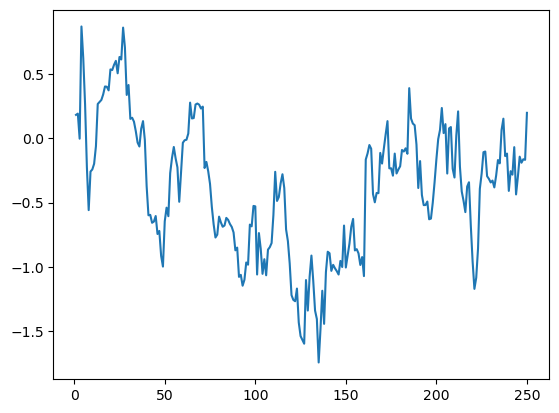

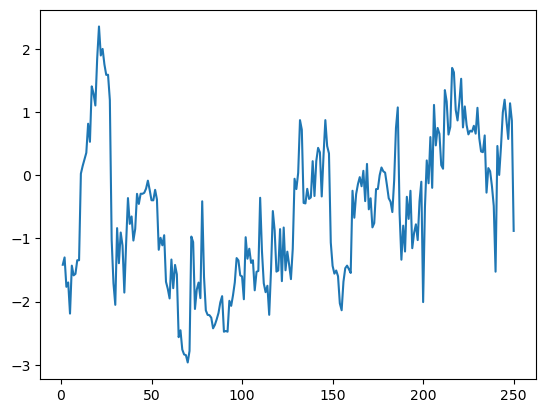

In [167]:
def hmc_lines_layer0_w(i, j):
    y = loaded_samples['layers.0.weight'][:,i,j].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

def hmc_lines_layer1_w(i, j):
    y = loaded_samples['layers.1.weight'][:,i,j].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

def hmc_lines_layer2_w(i, j):
    y = loaded_samples['layers.2.weight'][:,i,j].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

def hmc_lines_layer0_b(i):
    y = loaded_samples['layers.0.bias'][:,i].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

def hmc_lines_layer1_b(i):
    y = loaded_samples['layers.1.bias'][:,i].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

def hmc_lines_layer2_b(i):
    y = loaded_samples['layers.2.bias'][:,i].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

hmc_lines_layer1_w(4,4)

hmc_lines_layer2_b(3)